<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Matplotlib and Line Plots</font></h1>

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Images/Mod1Fig1-Dataset.png" align="center" width=900>

For sake of simplicity, Canada's immigration data has been extracted and uploaded to one of IBM servers. You can fetch the data from [here](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx).

---

## *pandas* Basics<a id="4"></a>

The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using *pandas* `read_excel()` method. Normally, before we can do that, we would need to download a module which *pandas* requires to read in excel files. This module is **xlrd**. For your convenience, we have pre-installed this module, so you would not have to worry about that. Otherwise, you would need to run the following line of code to install the **xlrd** module:
```
!conda install -c anaconda xlrd --yes
```

Now we are ready to read in our data.

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         197 non-null    object 
 1   Coverage     197 non-null    object 
 2   OdName       197 non-null    object 
 3   AREA         197 non-null    float64
 4   AreaName     197 non-null    object 
 5   REG          197 non-null    float64
 6   RegName      197 non-null    object 
 7   DEV          197 non-null    float64
 8   DevName      197 non-null    object 
 9   1980         197 non-null    float64
 10  1981         197 non-null    float64
 11  1982         197 non-null    float64
 12  1983         197 non-null    float64
 13  1984         197 non-null    float64
 14  1985         197 non-null    float64
 15  1986         197 non-null    float64
 16  1987         197 non-null    float64
 17  1988         197 non-null    float64
 18  1989         197 non-null    float64
 19  1990  

To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [6]:
df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [7]:
df_can.index.values

array([   0,    1,    2, ..., 1010, 1011, 1012])

Note: The default type of index and columns is NOT list.

In [8]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To get the index and columns as lists, we can use the `tolist()` method.

In [9]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [10]:
# size of dataframe (rows, columns)
df_can.shape    

(1013, 51)

Note: The main types stored in *pandas* objects are *float*, *int*, *bool*, *datetime64[ns]* and *datetime64[ns, tz] (in >= 0.17.0)*, *timedelta[ns]*, *category (in >= 0.15.0)*, and *object* (string). In addition these dtypes have item sizes, e.g. int64 and int32. 

Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:

In [11]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_can.drop(['Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)

In [13]:
df_can = df_can.dropna()

Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:

In [14]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [15]:
df_can['Total'] = df_can.sum(axis=1)

We can check to see how many null objects we have in the dataset as follows:

In [16]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.

In [17]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.029657e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004158e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,9.520000e+02
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,5.866000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.331000e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.924212e+06


---
## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name 
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python 
    df[['column 1', 'column 2']] 
        (returns dataframe)
```
---

Example: Let's try filtering on the list of countries ('Country').

In [18]:
df_can.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
192             Yemen
193            Zambia
194          Zimbabwe
195           Unknown
196             Total
Name: Country, Length: 197, dtype: object

Let's try filtering on the list of countries ('OdName') and the data for years: 1980 - 1985.

In [19]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16.0,39.0,39.0,47.0,71.0,340.0
1,Albania,1.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,80.0,67.0,71.0,69.0,63.0,44.0
3,American Samoa,0.0,1.0,0.0,0.0,0.0,0.0
4,Andorra,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
192,Yemen,1.0,2.0,1.0,6.0,0.0,18.0
193,Zambia,11.0,17.0,11.0,7.0,16.0,9.0
194,Zimbabwe,72.0,114.0,102.0,44.0,32.0,29.0
195,Unknown,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0


### Select Row

There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```

Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

In [20]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [21]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0


In [22]:
# optional: to remove the name of the index
df_can.index.name = None

Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
    1. The full row data (all columns)
    2. For year 2013
    3. For years 1980 to 1985

In [23]:
# 1. the full row data (all columns)
print(df_can.loc['Japan'])

# alternate methods
print(df_can.iloc[87])
print(df_can[df_can.index == 'Japan'].T.squeeze())

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                     701.0
1981                     756.0
1982                     598.0
1983                     309.0
1984                     246.0
1985                     198.0
1986                     248.0
1987                     422.0
1988                     324.0
1989                     494.0
1990                     379.0
1991                     506.0
1992                     605.0
1993                     907.0
1994                     956.0
1995                     826.0
1996                     994.0
1997                     924.0
1998                     897.0
1999                    1083.0
2000                    1010.0
2001                    1092.0
2002                     806.0
2003                     817.0
2004                     973.0
2005                    1067.0
2006                    1212.0
2007                    1250.0
2008                    1284.0
2009    

In [24]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982.0
982.0


In [25]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701.0
1981    756.0
1982    598.0
1983    309.0
1984    246.0
1984    246.0
Name: Japan, dtype: object
1980    701.0
1981    756.0
1982    598.0
1983    309.0
1984    246.0
1985    198.0
Name: Japan, dtype: object


Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. 

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [26]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [27]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector. 

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [28]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool


In [29]:
# 2. pass this condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Armenia,Asia,Western Asia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,224.0,218.0,198.0,205.0,267.0,252.0,236.0,258.0,207.0,3310.0
Azerbaijan,Asia,Western Asia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,359.0,236.0,203.0,125.0,165.0,209.0,138.0,161.0,57.0,2649.0
Bahrain,Asia,Western Asia,Developing regions,0.0,2.0,1.0,1.0,1.0,3.0,0.0,...,12.0,12.0,22.0,9.0,35.0,28.0,21.0,39.0,32.0,475.0
Bangladesh,Asia,Southern Asia,Developing regions,83.0,84.0,86.0,81.0,98.0,92.0,486.0,...,4171.0,4014.0,2897.0,2939.0,2104.0,4721.0,2694.0,2640.0,3789.0,65568.0
Bhutan,Asia,Southern Asia,Developing regions,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,10.0,7.0,36.0,865.0,1464.0,1879.0,1075.0,487.0,5876.0
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79.0,6.0,8.0,2.0,2.0,4.0,12.0,...,4.0,5.0,11.0,10.0,5.0,12.0,6.0,3.0,6.0,600.0
Cambodia,Asia,South-Eastern Asia,Developing regions,12.0,19.0,26.0,33.0,10.0,7.0,8.0,...,370.0,529.0,460.0,354.0,203.0,200.0,196.0,233.0,288.0,6538.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,729.0,712.0,674.0,897.0,657.0,623.0,591.0,728.0,774.0,9327.0


In [30]:
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Bangladesh,Asia,Southern Asia,Developing regions,83.0,84.0,86.0,81.0,98.0,92.0,486.0,...,4171.0,4014.0,2897.0,2939.0,2104.0,4721.0,2694.0,2640.0,3789.0,65568.0
Bhutan,Asia,Southern Asia,Developing regions,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,10.0,7.0,36.0,865.0,1464.0,1879.0,1075.0,487.0,5876.0
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172.0,1429.0,1822.0,1592.0,1977.0,1648.0,1794.0,...,5837.0,7480.0,6974.0,6475.0,6580.0,7477.0,7479.0,7534.0,11291.0,175923.0
Maldives,Asia,Southern Asia,Developing regions,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,7.0,4.0,3.0,1.0,1.0,30.0
Nepal,Asia,Southern Asia,Developing regions,1.0,1.0,6.0,1.0,2.0,4.0,13.0,...,607.0,540.0,511.0,581.0,561.0,1392.0,1129.0,1185.0,1308.0,10222.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0
Sri Lanka,Asia,Southern Asia,Developing regions,185.0,371.0,290.0,197.0,1086.0,845.0,1838.0,...,4930.0,4714.0,4123.0,4756.0,4547.0,4422.0,3309.0,3338.0,2394.0,148358.0


Before we proceed: let's review the changes we have made to our dataframe.

In [31]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (197, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


---
# Visualizing Data using Matplotlib<a id="8"></a>

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer. 


Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [32]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

*optional: check if Matplotlib is loaded.

In [33]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


*optional: apply a style to Matplotlib.

In [34]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.

In [35]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666.0
1981    3692.0
1982    3498.0
1983    2860.0
1984    1418.0
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

<AxesSubplot:>

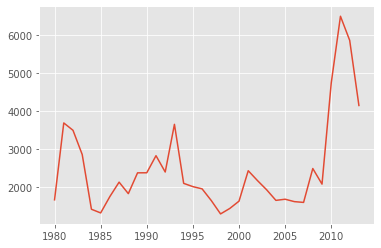

In [36]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type *string*. Therefore, let's change the type of the index values to *integer* for plotting.

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

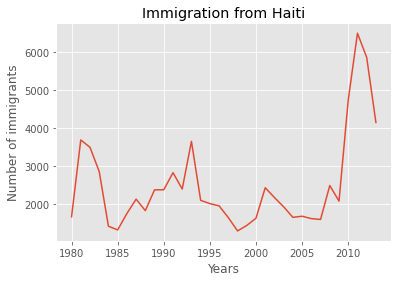

In [37]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.

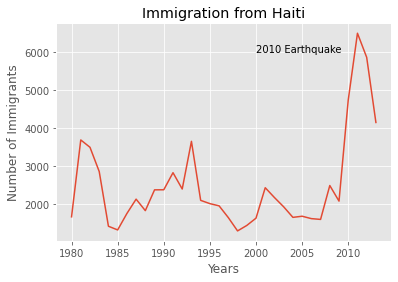

In [38]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:
    
     Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```
    If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```
    We will cover advanced annotation methods in later modules.

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [39]:
### type your answer here

df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,11522.0,10343.0,...,28235.0,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0
China,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,2758.0,4323.0,...,36619.0,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0


Double-click __here__ for the solution.
<!-- The correct answer is:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()
-->

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

<AxesSubplot:>

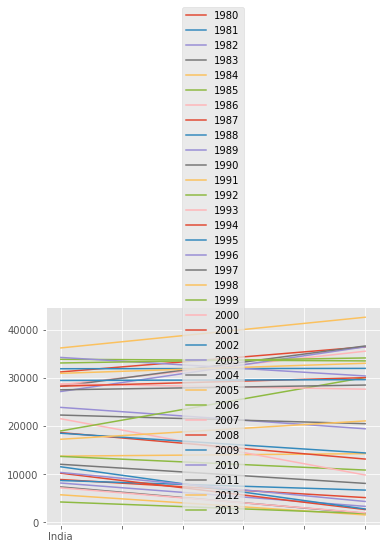

In [40]:
### type your answer here

df_CI.plot(kind='line')

Double-click __here__ for the solution.
<!-- The correct answer is:
df_CI.plot(kind='line')
-->

That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [41]:
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880.0,5123.0
1981,8670.0,6682.0
1982,8147.0,3308.0
1983,7338.0,1863.0
1984,5704.0,1527.0


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

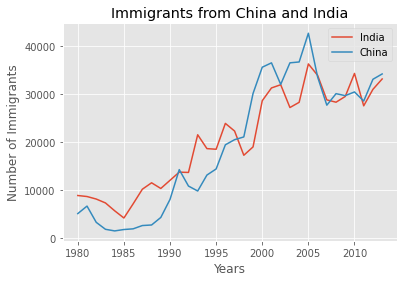

In [42]:
### type your answer here
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Double-click __here__ for the solution.
<!-- The correct answer is:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')
-->

<!--
plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
--> 

From the above plot, we can observe that the China and India have very similar immigration trends through the years. 

*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below. 
```python
print(type(haiti))
print(haiti.head(5))
```
>class 'pandas.core.series.Series' <br>
>1980    1666 <br>
>1981    3692 <br>
>1982    3498 <br>
>1983    2860 <br>
>1984    1418 <br>
>Name: Haiti, dtype: int64 <br>

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [43]:
df_can.tail(25)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
The former Yugoslav Republic of Macedonia,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.0,256.0,211.0,191.0,198.0,188.0,130.0,126.0,112.0,4637.0
Togo,Africa,Western Africa,Developing regions,5.0,5.0,2.0,3.0,6.0,5.0,8.0,...,157.0,149.0,235.0,351.0,400.0,354.0,261.0,299.0,316.0,3545.0
Tonga,Oceania,Polynesia,Developing regions,2.0,4.0,7.0,1.0,2.0,5.0,7.0,...,2.0,0.0,1.0,0.0,5.0,5.0,2.0,3.0,5.0,142.0
Trinidad and Tobago,Latin America and the Caribbean,Caribbean,Developing regions,958.0,947.0,972.0,766.0,606.0,699.0,955.0,...,857.0,794.0,975.0,1002.0,1134.0,915.0,588.0,586.0,427.0,50016.0
Tunisia,Africa,Northern Africa,Developing regions,58.0,51.0,55.0,46.0,51.0,57.0,64.0,...,756.0,1065.0,869.0,950.0,1195.0,1299.0,1442.0,1503.0,1627.0,17583.0
Turkey,Asia,Western Asia,Developing regions,481.0,874.0,706.0,280.0,338.0,202.0,257.0,...,2065.0,1638.0,1463.0,1122.0,1238.0,1492.0,1257.0,1068.0,729.0,31781.0
Turkmenistan,Asia,Central Asia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,26.0,37.0,13.0,20.0,30.0,20.0,20.0,14.0,310.0
Tuvalu,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0
Uganda,Africa,Eastern Africa,Developing regions,13.0,16.0,17.0,38.0,32.0,29.0,40.0,...,239.0,201.0,170.0,204.0,185.0,216.0,213.0,222.0,206.0,3450.0
Ukraine,Europe,Eastern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2270.0,1973.0,2218.0,1937.0,2367.0,3159.0,2515.0,2265.0,2487.0,51410.0


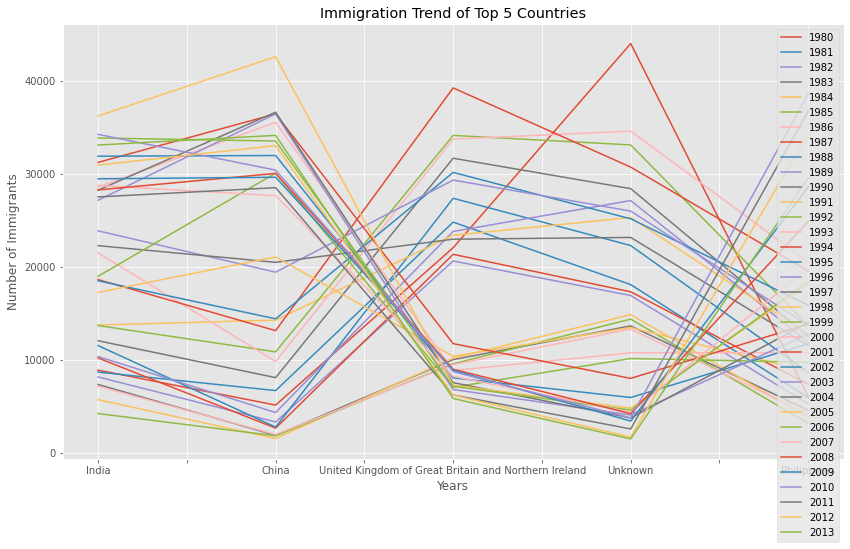

In [44]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can[1:6][years]

# df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Double-click __here__ for the solution.
<!-- The correct answer is:
\\ # Step 1: Get the dataset. Recall that we created a Total column that calculates the cumulative immigration by country. \\ We will sort on this column to get our top 5 countries using pandas sort_values() method.
\\ inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
-->

<!--
# get the top 5 entries
df_top5 = df_can.head(5)
-->

<!--
# transpose the dataframe
df_top5 = df_top5[years].transpose() 
-->

<!--
print(df_top5)
-->

<!--
\\ # Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
-->

<!--
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
-->

<!--
plt.show()
-->

### Other Plots

There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

This notebook was originally created by [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan) with contributions from [Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani), and [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic).

This notebook was recently revised by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab session interesting. Feel free to contact me if you have any questions!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).